In [6]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/Viswa/Desktop/ML_Algorithms_project_ICTA/mall-customers/dataset/mall-customers.csv')
dt = dataset
dt

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
#To know the headers
dt.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#To know some details of data
dt.isnull().sum()
dt.describe()
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [78]:
#Considering the independent variable values(Annual_Income_(k$),Spending_Score) as a matrix
X = dt.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


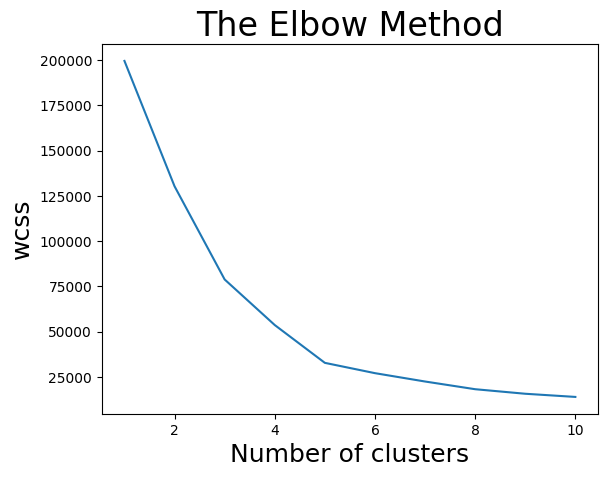

In [79]:
#Using KMeans for clustering the data
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)


font_title = {
        'weight' : 'bold',
        'size'   : 35}

font_axes = {
        'weight' : 'normal',
        'size'   : 28}
#Plotting Number of Clusters Vs wcss - The Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize=24)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('wcss', fontsize=18)
plt.show()

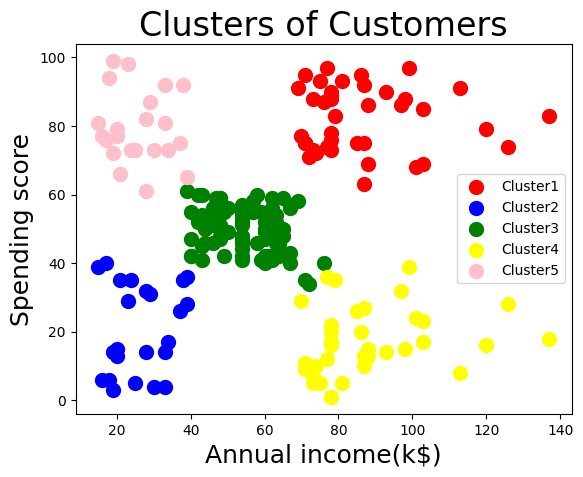

In [80]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers', fontsize=24)
plt.xlabel('Annual income(k$)', fontsize=18)
plt.ylabel('Spending score', fontsize=18)
plt.legend()
plt.show()

In [81]:
from collections import Counter
n_cust = Counter(y_kmeans)
print("The no: of customers in cluster 1 :", n_cust.get(0))
print("The no: of customers in cluster 2 :", n_cust.get(1))
print("The no: of customers in cluster 3 :", n_cust.get(2))
print("The no: of customers in cluster 4 :", n_cust.get(3))
print("The no: of customers in cluster 5 :", n_cust.get(4))

The no: of customers in cluster 1 : 39
The no: of customers in cluster 2 : 23
The no: of customers in cluster 3 : 81
The no: of customers in cluster 4 : 35
The no: of customers in cluster 5 : 22
